# Clustering Antarctic Penguin Species - Datacamp Project

Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means Clustering

## Project Description
Delve into the information about penguins by utilizing unsupervised learning techniques on a thoughtfully curated dataset. uncover concealed patterns, clusters, and relationships that exist within the dataset.

---

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [36]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


Before going to the creation of dummy variables it is a good practice to understand how much NaN we have on our dataset.

In [37]:
missing_counts = penguins_df.isna().sum()
missing_percentage = (missing_counts/len(penguins_df))*100
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage})
print(missing_summary)

                   Missing Count  Missing Percentage (%)
culmen_length_mm               2                0.581395
culmen_depth_mm                2                0.581395
flipper_length_mm              2                0.581395
body_mass_g                    2                0.581395
sex                            9                2.616279


Missing values is very low so let's drop the rows contaiing NaN.

In [38]:
penguins_cleaned = penguins_df.dropna()
penguins_cleaned.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


1. Perfrom preprocessing steps in the dataset to create dummy variables

In [39]:
penguins_with_dummies = pd.get_dummies(penguins_cleaned, columns=['sex'], drop_first=True, dtype='int')
penguins_with_dummies.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [40]:
# Since the drop_first=True did not leave only one column for the penguins sex, lets see if there arent any wrong data
unique_categories = penguins_cleaned['sex'].unique()
print("Unique categories in 'sex':", unique_categories)

Unique categories in 'sex': ['MALE' 'FEMALE' '.']


In [41]:
print(f"Number of invalid entries ('.') in 'sex': {(penguins_cleaned['sex'] == '.').sum()}")


Number of invalid entries ('.') in 'sex': 1


In [42]:
# Drop rows where 'sex' is '.'
penguins_cleaned = penguins_cleaned[penguins_cleaned['sex'] != '.']
print("Updated unique categories in 'sex':", penguins_cleaned['sex'].unique())

Updated unique categories in 'sex': ['MALE' 'FEMALE']


In [43]:
# Go back to making a dataframe with dummies
penguins_with_dummies = pd.get_dummies(penguins_cleaned, columns=['sex'], drop_first=True, dtype='int')
penguins_with_dummies.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


Now that the dataset is clean lets move to Scaling with StandardScaler

In [44]:
# Select only the numerical features for scaling
numerical_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_with_dummies[numerical_features])
penguins_scaled_df = pd.DataFrame(penguins_scaled, columns=numerical_features)
# Add the binary 'sex_MALE' column back to the scaled DataFrame
penguins_scaled_df['sex_MALE'] = penguins_with_dummies['sex_MALE'].values

# Display the scaled DataFrame
print(penguins_scaled_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0         -0.896113         0.774517          -0.126674    -0.569485         1
1         -0.822764         0.114726          -0.107681    -0.507204         0
2         -0.676065         0.419245          -0.073493    -1.192302         0
3         -1.336209         1.079036          -0.081090    -0.943175         0
4         -0.859439         1.738827          -0.092486    -0.694049         1


Lets visualy find how many clusters are best for this dataset

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

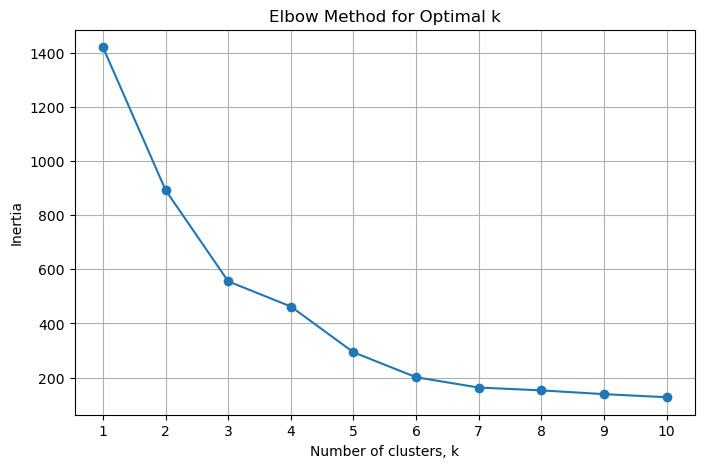

In [45]:
# Define the range of k values to test
ks = range(1, 11)
inertias = []

# Compute inertia for each k
for k in ks:
    model = KMeans(n_clusters=k, random_state=42)  # Ensure reproducibility with random_state
    model.fit(penguins_scaled_df)
    inertias.append(model.inertia_)

# Plot ks vs. inertias
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

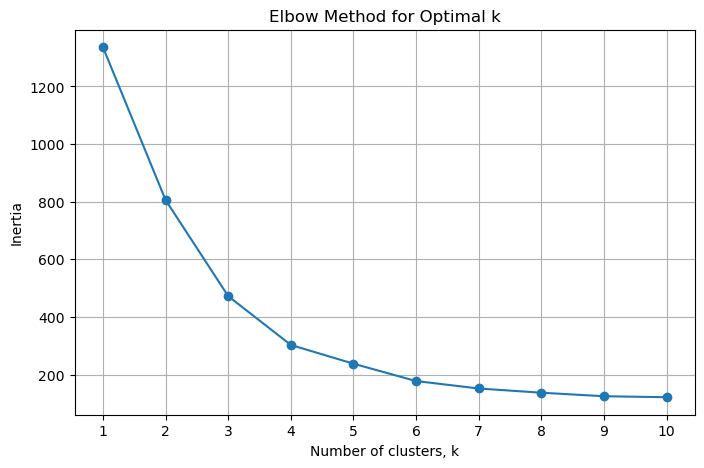

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select only the features for clustering (exclude binary 'sex_MALE' column)
samples = penguins_scaled_df.drop('sex_MALE', axis=1).values

# Define the range of k values to test
ks = range(1, 11)
inertias = []

# Compute inertia for each k
for k in ks:
    model = KMeans(n_clusters=k, random_state=42)  # Ensure reproducibility with random_state
    model.fit(samples)
    inertias.append(model.inertia_)

# Plot ks vs. inertias
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


It appears it depends if we use the sex column to how many clusters are best.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


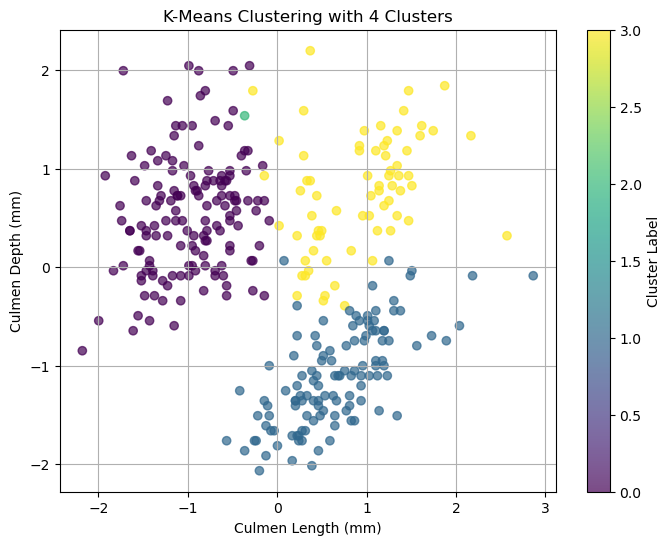

In [47]:
# Run k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
penguins_scaled_df['cluster'] = kmeans.fit_predict(samples)

# Visualization of clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    penguins_scaled_df['culmen_length_mm'], 
    penguins_scaled_df['culmen_depth_mm'], 
    c=penguins_scaled_df['cluster'], 
    cmap='viridis', 
    alpha=0.7
)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title(f'K-Means Clustering with {4} Clusters')
plt.grid()
plt.show()

In [48]:
# Step 1: Define numeric columns (excluding binary columns)
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Step 2: Add cluster labels to the original DataFrame
penguins_scaled_df['label'] = penguins_scaled_df['cluster']

# Step 3: Aggregate numeric columns by cluster using groupby and mean
stat_penguins = penguins_scaled_df.groupby('label')[numeric_columns].mean()

# Display the final characteristic DataFrame
print("Final Characteristics of Each Cluster:")
print(stat_penguins)


Final Characteristics of Each Cluster:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             -0.968830         0.535452          -0.102336    -0.685243
1              0.656704        -1.105055           0.010970     1.102698
2             -0.364331         1.535814          18.178878     0.053331
3              0.908652         0.758335          -0.067327    -0.462523
